## 1. 선형회귀 실습 -  sklearn 

In [1]:
from sklearn.linear_model import LinearRegression # 선형회귀 모델 라이브러리 호출
import pandas as pd # 데이터프레임 라이브러리 호출 > pandas를 pd로 축약
import numpy as np # 넘파이 라이브러리 호출 > numpy를 np로 축약
import matplotlib.pyplot as plt # 시각화 라이브러리 호출 > matplotlib.pyplot을 plt로 축약

### 데이터 읽어오기

In [2]:
df = pd.read_csv("weight-height.csv") # csv 파일을 데이터프레임으로 변환 > df로 저장 
df.head() # 데이터프레임의 상위 5개 데이터 출력

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


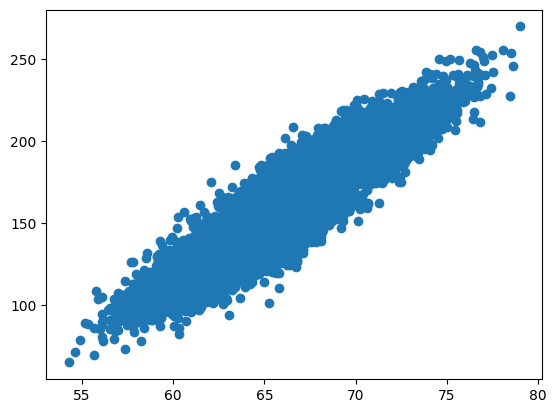

In [3]:
x = df["Height"] # 독립변수 x > 키
y = df["Weight"] # 종속변수 y > 몸무게
plt.plot(x, y, 'o') # 산점도 그래프 출력 > 'o'는 점으로 표시 
plt.show() # 그래프 출력

In [4]:
x.values.shape # x의 형태 출력 > 1차원 배열

(10000,)

### 데이터셋 분할 (Train / Test)

In [5]:
from sklearn.model_selection import train_test_split # 데이터셋 분할 라이브러리 호출
x = df[['Height']] # 독립변수 x > 키
y = df[['Weight']] # 종속변수 y > 몸무게
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3) # 데이터셋 분할 > train_size: 학습 데이터셋 비율, test_size: 테스트 데이터셋 비율

### 모델 생성 및 학습

In [6]:
type(x_train.values) # x_train의 형태 출력  > 2차원 배열

numpy.ndarray

In [7]:
lr = LinearRegression() # 선형회귀 모델 생성 > lr로 저장
lr.fit(x_train.values, y_train.values) # 선형회귀 모델 학습 > x_train: 독립변수, y_train: 종속변수

LinearRegression()

### 모델 활용 (예측)

In [8]:
lr.predict([[70]]) # 키가 70인 사람의 몸무게 예측 


array([[189.60007471]])

### 모델 계수 확인

In [9]:
lr.coef_ # 회귀계수 출력  > 기울기


array([[7.71197245]])

In [10]:
lr.intercept_ # 절편 출력  > y절편

array([-350.23799655])

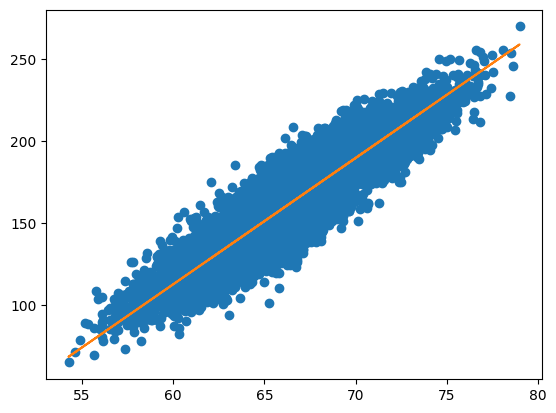

In [11]:
plt.plot(x, y, 'o') # 산점도 그래프 출력 > x: 키, y: 몸무게
plt.plot(x,lr.predict(x.values.reshape(-1,1))) # 회귀선 그래프 출력 > x: 키, y: 몸무게 예측값
plt.show() # 그래프 출력

### 모델 평가 : 결정계수 $R^2$
- $1- {u}/{v}$
- $u$ : RSS(residual sum of squre) (잔차의 제곱의 평균)
  - ```((y - y_predict)**2)).sum()```
- $v$ : TSS(total sum of squre) (y값의 총 변화량) 
  - ```((y-y.mean())**2).sum()```
- 결정계수 $R^2$가 클수록 실제값과 예측값이 유사함을 의미 
  - 0.75 이상이면 양호한 것으로 평가

In [12]:
print(lr.score(x_test.values, y_test.values)) # 테스트 데이터셋의 결정계수 출력 > 결정계수: 회귀선이 데이터를 얼마나 잘 설명하는지를 나타내는 지표. 1에 가까울수록 데이터를 잘 설명함.
# Return the coefficient of determination of the prediction.

0.8585778564341333


## 2. 다중선형회귀

### 데이터 읽어오기

In [13]:
import pandas as pd # 데이터프레임 라이브러리 호출 > pandas를 pd로 축약
df = pd.read_csv("manhattan.csv") # csv 파일을 데이터프레임으로 변환 > df로 저장 
df.head() # 데이터프레임의 상위 5개 데이터 출력

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


### 데이터셋 분할 (Train / Test)

In [14]:
from sklearn.model_selection import train_test_split # 데이터셋 분할 라이브러리 호출
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']] # 독립변수 x > 침실 수, 욕실 수, 평방 피트, 지하철까지의 거리, 층, 건물 연식, 수수료 없음 여부, 옥상, 세탁기 및 건조기, 경비원, 엘리베이터, 식기세척기, 파티오, 체육관
y = df[['rent']] # 종속변수 y > 월세
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2) # 데이터셋 분할 > train_size: 학습 데이터셋 비율, test_size: 테스트 데이터셋 비율

### 모델 생성 및 학습

In [15]:
from sklearn.linear_model import LinearRegression # 선형회귀 모델 라이브러리 호출
mlr = LinearRegression() # 선형회귀 모델 생성
mlr.fit(x_train, y_train)  # 선형회귀 모델 학습 > 학습 데이터셋의 독립변수와 종속변수를 입력

LinearRegression()

### 모델 활용 (예측)

In [16]:
my_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]] # 침실 수, 욕실 수, 평방 피트, 지하철까지의 거리, 층, 건물 연식, 수수료 없음 여부, 옥상, 세탁기 및 건조기, 경비원, 엘리베이터, 식기세척기, 파티오, 체육관
my_predict = mlr.predict(my_apartment) # 학습된 선형회귀 모델을 이용하여 월세 예측

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [17]:
my_predict # 월세 예측 출력

array([[2313.2728946]])

In [18]:
y_predict = mlr.predict(x_test) # 테스트 데이터셋의 종속변수 예측

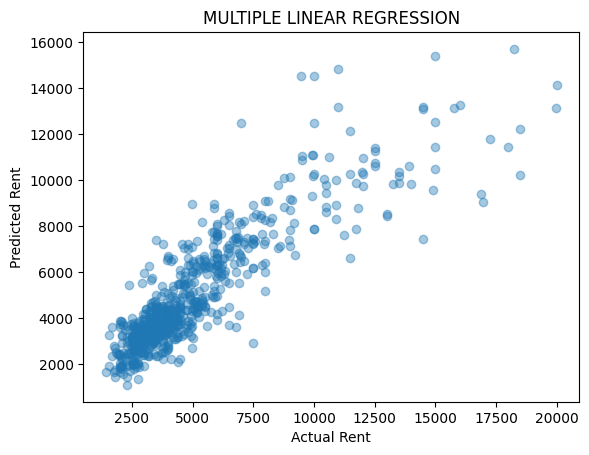

In [19]:
import matplotlib.pyplot as plt # 시각화 라이브러리 호출 > matplotlib.pyplot을 plt로 축약
plt.scatter(y_test, y_predict, alpha=0.4) # 산점도 그래프 출력 > x: 실제 월세, y: 예측 월세 > alpha: 점의 투명도
plt.xlabel("Actual Rent") # x축 라벨 > 실제 월세
plt.ylabel("Predicted Rent") # y축 라벨 > 예측 월세
plt.title("MULTIPLE LINEAR REGRESSION") # 그래프 제목 > 다중 선형회귀
plt.show() # 그래프 출력

### 모델 계수 확인

In [20]:
print(mlr.coef_) # 회귀계수 출력 > 기울기

[[-301.75251728 1167.62217743    4.8449706   -18.31387352   25.06978979
    -7.93321104 -169.61569449   15.35603787  152.5353244  -184.33563334
    94.85779202  -24.49264126 -140.59470315    9.67508227]]


In [21]:
print(mlr.intercept_) # 절편 출력 > y절편

[-328.90395184]


### 모델 평가 : 결정계수 $R^2$

In [22]:
print(mlr.score(x_test, y_test)) # 테스트 데이터셋의 결정계수 출력 > 결정계수: 회귀선이 데이터를 얼마나 잘 설명하는지를 나타내는 지표. 1에 가까울수록 데이터를 잘 설명함.

0.7703611602129514
